<a href="https://colab.research.google.com/github/nastaranmarzban/BGAT-and-GAT-Jupyter-notebook/blob/main/GAT_4classes_100nodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount to gdrive to read data, adjacency matrix, p_link and labels.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Install pandas to read csv files from gdrive. Install torch and numpy which are packages that are needed durind coding.

In [ ]:
!pip install pandas
import pandas as pd
import torch
import numpy as np

# Load data which are processed in preprocessing_data_4classdes.ipynb file.

In [ ]:
path = F"/gdrive/MyDrive/4classes_100.sim/data.pt"
Data = torch.load(path)
Data

{'x': tensor([[-0.2138,  0.1836, -1.2796,  ..., -0.7865,  0.3766, -0.0634],
         [ 0.1939, -1.7053,  0.0836,  ...,  1.9979, -0.0287,  0.2419],
         [ 1.1427, -0.1411, -1.8947,  ..., -1.1283, -2.1305, -0.6967],
         ...,
         [ 0.2675, -1.8261,  0.3187,  ...,  1.4613, -0.2672,  0.4551],
         [ 0.4348, -0.0747, -0.3687,  ..., -0.3990, -0.2855, -0.3294],
         [ 1.1066,  0.3640, -1.1720,  ...,  0.7746,  0.5340, -0.4019]]),
 'edge_index': tensor([[ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,
           4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  7,  8,  8,  8,  9,
           9,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 16,
          16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
          18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21,
          21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23,
          23, 23, 24, 24, 24, 24, 24, 24, 24, 2

# Gather some statistics about the graph.

In [ ]:
print(f'Number of nodes: {Data["x"].size(0)}')
print(f'Number of features: {Data["x"].size(1)}')
print(f'Number of classes: {torch.numel(torch.unique(Data["y"],sorted=True))}')
print(f'Number of edges: {Data["edge_index"].size(1)}')
print(f'Average node degree: {Data["edge_index"].size(1) / Data["x"].size(0):.2f}')
print(f'Number of training nodes: {Data["train_mask"].sum()}')
print(f'Number of testing nodes: {Data["test_mask"].sum()}')
print(f'Training node label rate: {int(Data["train_mask"].sum()) /  Data["x"].size(0):.2f}')

Number of nodes: 100
Number of features: 500
Number of classes: 4
Number of edges: 478
Average node degree: 4.78
Number of training nodes: 80
Number of testing nodes: 10
Training node label rate: 0.80


# Install torch_geometic

In [ ]:
import os
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.1.0+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from torch_geometric.nn import MessagePassing
import torch_geometric.nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

# Creating message passing network.

In [ ]:
class Myconv(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(2)
        self.conv1 = GATConv(in_channels = 500, out_channels = 10)
        self.conv2 =  GATConv(10, 8)
        self.conv3 =  GATConv(8, 4)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = F.tanh(h)
        h = self.conv2(h, edge_index)
        h = F.tanh(h)
        h = self.conv3(h, edge_index)# Final GNN embedding space.
        return h

model = Myconv()
print(model)
print(model.forward(Data["x"], Data["edge_index"]))

Myconv(
  (conv1): GATConv(500, 10, heads=1)
  (conv2): GATConv(10, 8, heads=1)
  (conv3): GATConv(8, 4, heads=1)
)
tensor([[-8.5833e-02,  2.2186e-02,  2.1388e-01,  1.3620e-01],
        [ 2.1522e-02, -1.2953e+00, -3.1446e-02, -6.5495e-02],
        [ 7.0047e-02, -1.0508e+00, -7.5006e-02, -5.5570e-03],
        [ 8.2589e-02,  8.6290e-01, -6.5793e-01,  2.0400e-02],
        [ 2.3856e-01,  2.0949e-01, -3.2960e-01, -3.1651e-04],
        [ 2.8932e-02, -1.2391e+00, -1.0729e-02, -3.7505e-02],
        [ 1.6480e-02, -4.2677e-01,  3.1041e-01,  9.3524e-02],
        [ 2.2807e-01, -3.2771e-01,  3.1567e-01, -2.5026e-01],
        [ 1.9845e-02,  1.2832e-02, -7.4272e-02,  1.7847e-01],
        [ 6.2664e-03, -9.5121e-01,  4.6903e-02, -5.4209e-02],
        [ 5.6934e-02, -6.0467e-01,  2.9550e-01, -3.5214e-01],
        [ 7.0923e-02, -6.3220e-01,  3.0955e-01, -3.5184e-01],
        [-1.7702e-01, -1.6906e-01,  5.6111e-01, -4.7541e-01],
        [ 1.3140e-02, -6.3879e-01,  1.6451e-01, -5.8255e-03],
        [ 2.4402

# We take a look at the node embeddings produced by GAT (before training).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

def visualize(h):
    z = TSNE(n_components = 2, random_state = 0).fit_transform(h.detach().numpy())
    plt.figure(figsize = (6,4),  dpi = 120)
    sns.scatterplot(x = z[:, 0], y = z[:, 1], hue = Data["y"], palette=sns.color_palette("bright",4)).set(title = "First scenario data T-SNE projection before training (GAT)")

Embedding shape: [100, 4]


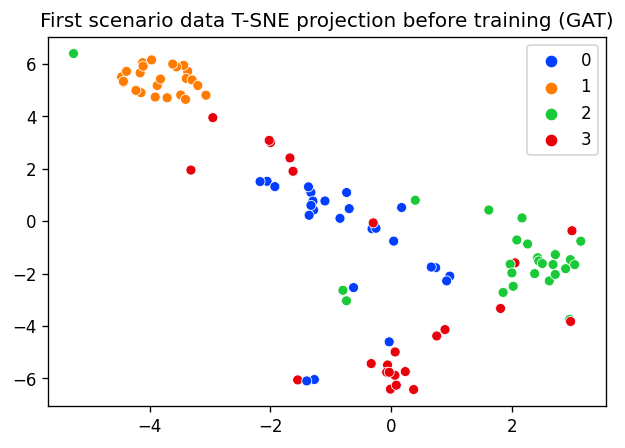

In [ ]:
model = Myconv()
h = model(Data["x"], Data["edge_index"])

print(f'Embedding shape: {list(h.shape)}')
visualize(h)

# Start training the model.

In [ ]:
model = Myconv()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(),  lr = 0.0005)  # Define optimizer, an object for updating parameters
#loss = loss + weight decay parameter * L2 norm of the weights, 1) To prevent overfitting 2) To keep the weights small and avoid exploding gradient

def train(Data):
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(Data["x"], Data["edge_index"])
    train_loss = criterion(out[Data["train_mask"]], Data["y"][Data["train_mask"]])  # Compute the loss solely based on the training nodes.
    train_loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return train_loss


def val(Data):
      model.eval()
      with torch.no_grad():
        out = model(Data["x"], Data["edge_index"])
        val_loss = criterion(out[Data["val_mask"]], Data["y"][Data["val_mask"]])
        return val_loss

In [ ]:
train_loss_ = []
val_loss_ = []

for epoch in range(1, 56):

  epoch_train_loss = []
  epoch_val_loss = []
  train_loss = train(Data)
  val_loss = val(Data)






  epoch_train_loss.append(train_loss.item())
  epoch_val_loss.append(val_loss.item())






  val_loss_.append(sum(epoch_val_loss)/len(epoch_val_loss))
  train_loss_.append(sum(epoch_train_loss)/len(epoch_train_loss))
  print(epoch,'Train Loss: %.3f | val Loss: %.3f'%( train_loss,val_loss))

1 Train Loss: 1.601 | val Loss: 1.538
2 Train Loss: 1.537 | val Loss: 1.477
3 Train Loss: 1.465 | val Loss: 1.411
4 Train Loss: 1.387 | val Loss: 1.346
5 Train Loss: 1.310 | val Loss: 1.295
6 Train Loss: 1.253 | val Loss: 1.261
7 Train Loss: 1.217 | val Loss: 1.232
8 Train Loss: 1.185 | val Loss: 1.203
9 Train Loss: 1.154 | val Loss: 1.176
10 Train Loss: 1.123 | val Loss: 1.149
11 Train Loss: 1.092 | val Loss: 1.124
12 Train Loss: 1.063 | val Loss: 1.100
13 Train Loss: 1.035 | val Loss: 1.078
14 Train Loss: 1.009 | val Loss: 1.059
15 Train Loss: 0.985 | val Loss: 1.040
16 Train Loss: 0.964 | val Loss: 1.023
17 Train Loss: 0.944 | val Loss: 1.007
18 Train Loss: 0.925 | val Loss: 0.991
19 Train Loss: 0.907 | val Loss: 0.976
20 Train Loss: 0.889 | val Loss: 0.961
21 Train Loss: 0.872 | val Loss: 0.947
22 Train Loss: 0.855 | val Loss: 0.933
23 Train Loss: 0.839 | val Loss: 0.919
24 Train Loss: 0.823 | val Loss: 0.906
25 Train Loss: 0.809 | val Loss: 0.893
26 Train Loss: 0.795 | val Loss: 0

# Visualize train loss and val loss.

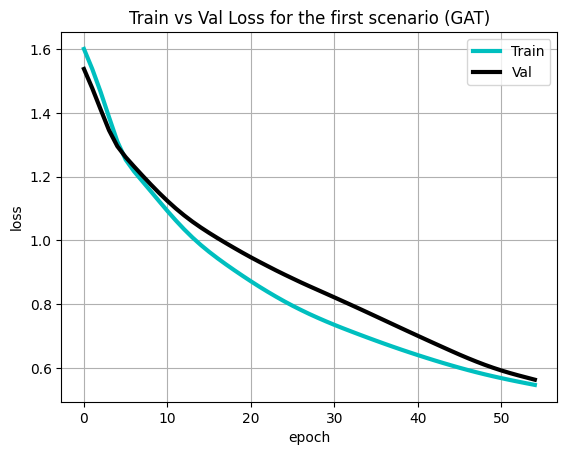

In [ ]:
plt.plot(train_loss_, "c", linewidth = 3)
plt.plot(val_loss_, "k", linewidth = 3)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.title('Train vs Val Loss for the first scenario (GAT)')
plt.grid()
plt.show()

# Compute the accuracy of the model.

In [ ]:
def test(Data):
      model.eval()
      with torch.no_grad():
        out = model(Data["x"], Data["edge_index"])
        pred = out.argmax(dim = 1)
        test_correct = pred[Data["test_mask"]] == Data["y"][Data["test_mask"]]  # Check against ground-truth labels.
        test_acc = int(test_correct.sum()) / int(Data["test_mask"].sum())  # Derive ratio of correct predictions.
        return test_acc

In [ ]:
test_acc = test(Data)
print(f'Test Accuracy: {100*test_acc:.2f}')

Test Accuracy: 90.00


# We take a look at the node embeddings produced by GAT (after training).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

def visualize(h):
    z = TSNE(n_components = 2, random_state = 0).fit_transform(h.detach().numpy())
    plt.figure(figsize = (6,4),  dpi = 120)
    sns.scatterplot(x = z[:, 0], y = z[:, 1], hue = Data["y"], palette=sns.color_palette("bright",4)).set(title = "First scenario data T-SNE projection after training (GAT)")

Embedding shape: [100, 4]


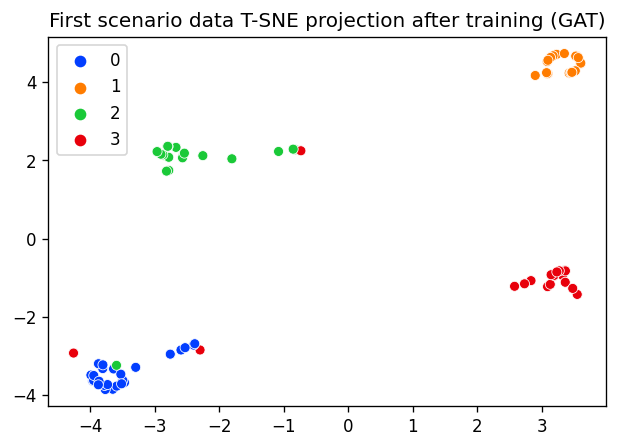

In [ ]:
model.eval()
out = model(Data["x"], Data["edge_index"])
print(f'Embedding shape: {list(h.shape)}')
visualize(out)


# Confusion matrix.

In [ ]:
pred_t = out.argmax(dim=1)
pred_t

tensor([0, 1, 3, 3, 3, 1, 0, 3, 3, 3, 2, 2, 2, 0, 3, 2, 2, 1, 3, 1, 0, 1, 2, 1,
        1, 3, 3, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 0, 0, 1, 2, 2, 2,
        2, 2, 0, 2, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 3, 1, 2, 2, 2, 0, 1, 0, 2, 1,
        0, 0, 1, 2, 2, 3, 0, 2, 3, 0, 1, 1, 0, 0, 0, 2, 3, 1, 1, 0, 1, 3, 3, 0,
        1, 1, 0, 0])

In [ ]:
Data["y"]

tensor([0, 1, 3, 3, 3, 1, 0, 3, 3, 3, 2, 2, 2, 0, 3, 2, 2, 1, 3, 1, 0, 1, 2, 1,
        1, 3, 3, 1, 2, 3, 3, 1, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 0, 0, 1, 2, 2, 2,
        2, 2, 0, 2, 3, 0, 2, 3, 2, 3, 0, 3, 3, 2, 3, 1, 2, 2, 2, 0, 1, 0, 2, 1,
        0, 0, 1, 2, 2, 3, 0, 2, 3, 0, 1, 1, 0, 0, 0, 2, 3, 1, 1, 0, 1, 3, 3, 0,
        1, 1, 2, 0])

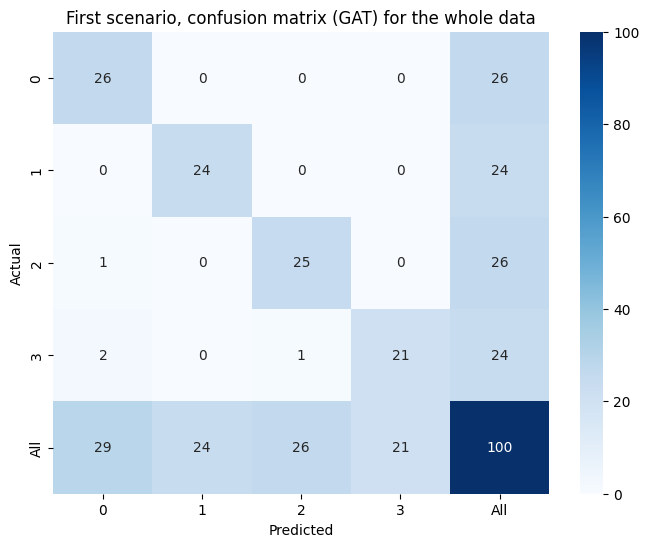

In [ ]:
import seaborn as sn
confusion_matrix = pd.crosstab(Data['y'], pred_t, rownames=['Actual'], colnames = ['Predicted'], margins = True)
plt.figure(figsize=(8, 6))
sn.heatmap(confusion_matrix, annot=True,  cmap="Blues", fmt='g')
plt.title('First scenario, confusion matrix (GAT) for the whole data')
plt.show()

In [ ]:
pred = pred_t[Data["test_mask"]]

In [ ]:
act = Data["y"][Data["test_mask"]]

In [ ]:
data = {'y_Actual':    act,
        'y_Predicted':pred
        }

df = pd.DataFrame(data, columns = ['y_Actual','y_Predicted'])
df

,y_Actual,y_Predicted
0,0,0
1,3,0
2,2,2
3,3,3
4,0,0
5,2,2
6,2,2
7,0,0
8,1,1
9,1,1


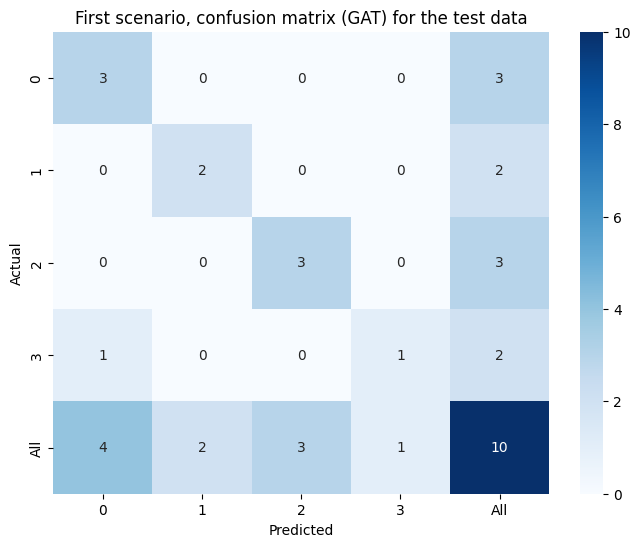

In [ ]:
import seaborn as sn
confusion_matrix = pd.crosstab(act, pred, rownames=['Actual'], colnames = ['Predicted'], margins = True)
plt.figure(figsize=(8, 6))
sn.heatmap(confusion_matrix, annot=True,  cmap="Blues", fmt='g')
plt.title('First scenario, confusion matrix (GAT) for the test data')
plt.show()